# EDGE DETECTION

## SOBEL'S DETECTION

`Sobel edge detection` is a popular technique in image processing used for detecting edges in digital images. It is named after its inventor, Irwin Sobel, and is a fundamental step in many computer vision and image analysis applications. Sobel edge detection operates by calculating the gradient magnitude of an image to highlight regions of high spatial intensity variation, which typically correspond to edges or boundaries between different objects or regions in the image.

When using a Sobel Edge Detector, it is first best to convert the image from an RGB scale to a Grayscale image. Then from there, we will use what is called kernel convolution. A kernel is a 3 x 3 matrix consisting of differently (or symmetrically) weighted indexes. This will represent the filter that we will be implementing for an edge detection.

![image info](./x_kenel.png)

By using Kernel Convolution, we can see in the example image below there is an edge between the column of 100 and 200 values.

![image info](./Kernelconvolution_ex.png)

`The Canny edge detector` is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works.

One important thing to mention, is that the algorithm is based on grayscale pictures. Therefore, the pre-requisite is to convert the image to grayscale before following the above-mentioned steps.



`edges_canny = cv2.Canny(img_gray, 50, 150)`:
    This line applies the Canny edge detection algorithm to the grayscale image img_gray. The parameters 50 and 150 are the lower and upper thresholds respectively. These values determine which edges are considered strong (between the upper and lower thresholds) and weak (below the lower threshold).


`lines_canny = cv2.HoughLinesP(edges_canny, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)`: This line applies the Hough Line Transform to detect lines in the edges detected by the Canny algorithm (edges_canny).

The parameter `1` is the distance resolution in pixels.

`np.pi/180` is the angular resolution in radians.

`threshold=50` is the minimum number of votes (intersections in Hough grid cell) required for a line to be detected.

`minLineLength=50` is the minimum length of line segments to be considered.

`maxLineGap=10` is the maximum gap allowed between line segments to be considered as a single line.


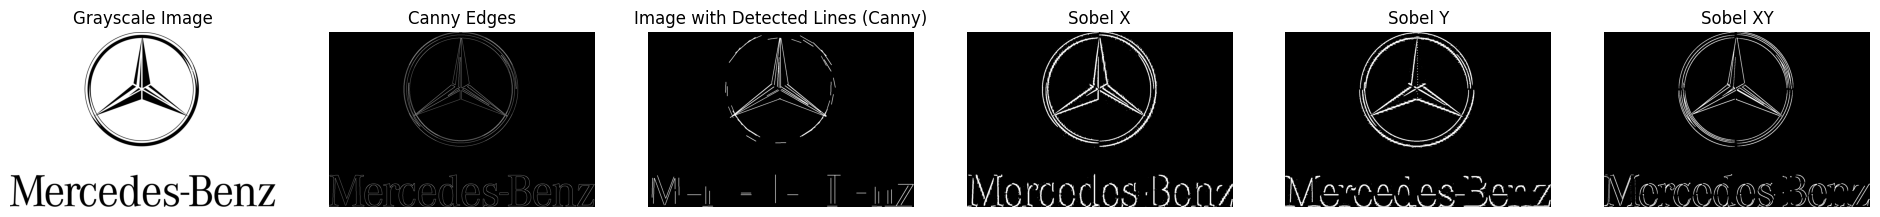

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
img_gray = cv2.imread('image_2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect edges using Canny edge detection
edges_canny = cv2.Canny(img_gray, 50, 150)

# Perform Hough Line Transform to detect lines on Canny edges
lines_canny = cv2.HoughLinesP(edges_canny, 1, np.pi/180, threshold=50, minLineLength=50, maxLineGap=10)

# Draw lines on a blank image for Canny edges
img_with_lines_canny = np.zeros_like(img_gray, dtype=np.uint8)
if lines_canny is not None:
    for line in lines_canny:
        x1, y1, x2, y2 = line[0]
        cv2.line(img_with_lines_canny, (x1, y1), (x2, y2), (255, 255, 255), 2)  # Draw white lines

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

# Combine X and Y Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# Thresholding for Sobel edges
threshold = 50  # Set the threshold value to 50

sobelx[sobelx < threshold] = 0  # Set pixels with sobelx gradient magnitude below threshold to 0 (black)
sobelx[sobelx >= threshold] = 255  # Set pixels with sobelx gradient magnitude above or equal to threshold to 255 (white)

sobely[sobely < threshold] = 0  # Set pixels with sobely gradient magnitude below threshold to 0 (black)
sobely[sobely >= threshold] = 255  # Set pixels with sobely gradient magnitude above or equal to threshold to 255 (white)

sobelxy[sobelxy < threshold] = 0  # Set pixels with sobelxy gradient magnitude below threshold to 0 (black)
sobelxy[sobelxy >= threshold] = 255  # Set pixels with sobelxy gradient magnitude above or equal to threshold to 255 (white)


# Display the original grayscale image and the images with detected edges using matplotlib
methods = [
    ("Grayscale Image", img_gray),
    ("Canny Edges", edges_canny),
    ("Image with Detected Lines (Canny)", img_with_lines_canny),
    ("Sobel X", sobelx),
    ("Sobel Y", sobely),
    ("Sobel XY", sobelxy)
]

plt.figure(figsize=(24, 6))

for i, (title, image) in enumerate(methods, start=1):
    plt.subplot(1, len(methods), i)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()


As we can see, the images are fairly similar simply because many of the edges in the image are at an angle. However, we can see that in `Sobel Y image`, it does not catch a lot of the details. This is because when we use the Y direction, we are scanning from top to bottom, and it will only detect edges that are horizontal in the image. On the other hand, `Sobel X imgae` will detect more clearly because the image will be processed from left to right using a different filter. You can see the chart below for more information.

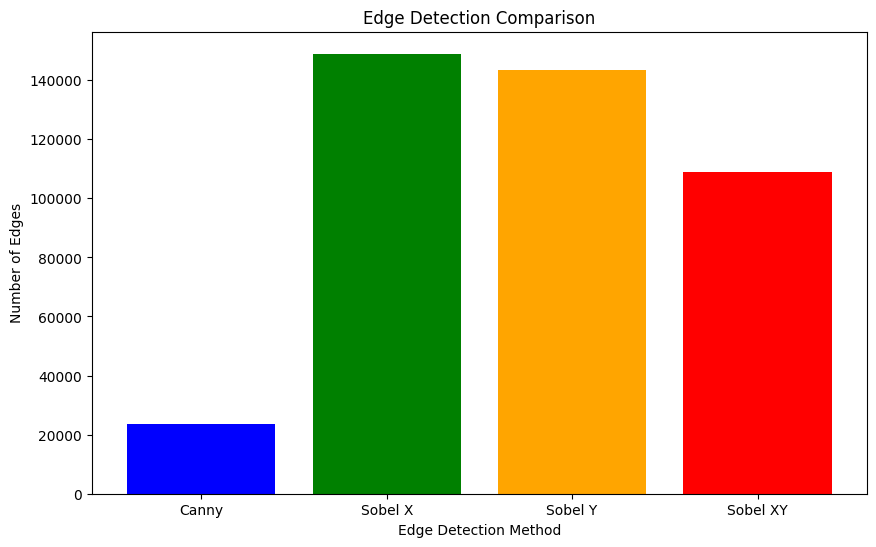

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
img_gray = cv2.imread('image_2.jpg', cv2.IMREAD_GRAYSCALE)

# Detect edges using Canny edge detection
edges_canny = cv2.Canny(img_gray, 50, 150)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Sobel Edge Detection on the X axis
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

# Sobel Edge Detection on the Y axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

# Combine X and Y Sobel Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

# Thresholding for Sobel edges
threshold = 50
sobelx_edges = np.uint8(np.abs(sobelx) > threshold) * 255
sobely_edges = np.uint8(np.abs(sobely) > threshold) * 255
sobelxy_edges = np.uint8(np.abs(sobelxy) > threshold) * 255

# Calculate the edge counts for each method
canny_edge_count = np.sum(edges_canny != 0)
sobelx_edge_count = np.sum(sobelx_edges != 0)
sobely_edge_count = np.sum(sobely_edges != 0)
sobelxy_edge_count = np.sum(sobelxy_edges != 0)

# Create a bar chart to visualize edge counts
methods = ['Canny', 'Sobel X', 'Sobel Y', 'Sobel XY']
edge_counts = [canny_edge_count, sobelx_edge_count, sobely_edge_count, sobelxy_edge_count]

plt.figure(figsize=(10, 6))
plt.bar(methods, edge_counts, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Edge Detection Method')
plt.ylabel('Number of Edges')
plt.title('Edge Detection Comparison')
plt.show()


`------------------------------------------------------------------------------------------------------------------------------------`

## LAPLACIAN'S METHOD

`Laplacian Filter` (also known as Laplacian over Gaussian Filter (LoG)), in Machine Learning, is a convolution filter used in the convolution layer to detect edges in input. It can be said derivative filters which used to extract the vertical as well as horizontal edges from an image. This is how they separate themselves from the usual `sobel filters`.

This is how sobel filters work. They take one derivative and find an edge in either of the one dimension (x or y).
But with Laplacian filter, we can get edges in both dimensions, hence we take double derivative of the intensities. And what happens when we do double derivation, the graph points to zero. So we will check those pixels which lead to zero and then mark them as edge points.

`The Laplacian operator` is a kernel used in image processing for edge detection. It highlights areas of rapid intensity change in an image, such as edges.

The result of applying the Laplacian operator to an image is a new image where pixels corresponding to edges typically have higher intensity values compared to non-edge regions.

`Thresholding` is a technique used to segment an image by classifying pixels into different categories based on their intensity values.

In the context of edge detection, thresholding is applied to the Laplacian edge-detected image to separate regions with significant intensity changes (edges) from regions with less significant changes (non-edges).

The threshold value (threshold) determines the minimum intensity difference required for a pixel to be classified as an edge. Pixels with intensity values above the threshold are considered edges, while those below are considered non-edges.


`Enhanced Laplacian edge detection` is a technique used to improve the detection and visibility of edges in an image using the Laplacian operator. The Laplacian operator is a second-order derivative operator that highlights rapid intensity changes in an image, which typically correspond to edges.

`Basic Laplacian Edge Detection`:

    `Approach`: In basic Laplacian edge detection, the Laplacian operator is applied directly to the image to highlight areas of rapid intensity change, which typically correspond to edges.
    `Effectiveness`: While Laplacian edge detection is effective in detecting edges, it may not always produce well-defined edges, especially in regions with low contrast or noise. It can also be sensitive to noise and produce false positives.


`Enhanced Laplacian Edge Detection`:

    `Approach`: Enhanced Laplacian edge detection involves additional processing steps to improve the visibility of edges detected by the Laplacian operator.
    `Effectiveness`: Enhanced Laplacian edge detection enhances the edges detected by the Laplacian operator by combining the Laplacian image with the original image in a manner that accentuates the edges while preserving other details. This typically results in sharper and more well-defined edges compared to basic Laplacian edge detection. It can also help mitigate the effects of noise and produce cleaner edge maps.


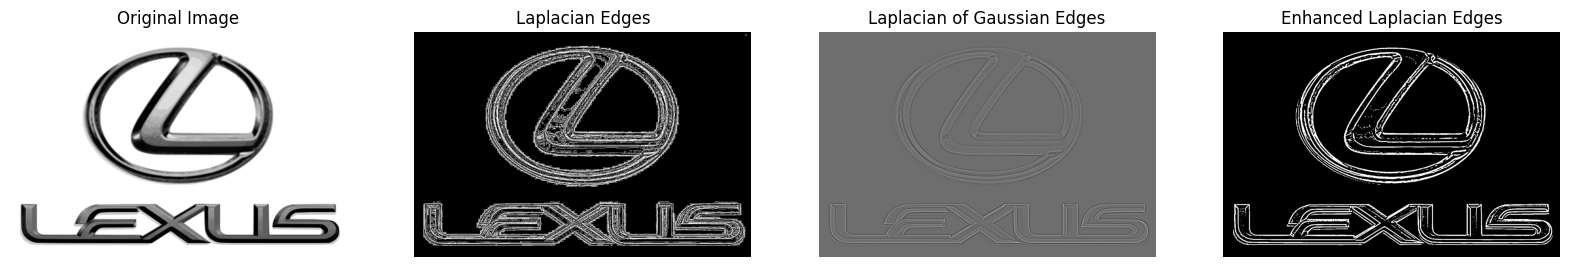

In [26]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the color image
img_color = Image.open('image_3.jpg')  # Replace 'image_3.jpg' with the path to your image

# Convert the image to grayscale
img_gray_color = img_color.convert('L')

# Convert grayscale image to numpy array
img_array_color = np.array(img_gray_color)

# Apply Gaussian blur to the grayscale image
def gaussian_blur(image, sigma=1):
    kernel_size = int(2 * round(3 * sigma) + 1)
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2)/(2*sigma**2)), (kernel_size, kernel_size))
    return convolve(image, kernel)

def laplacian_of_gaussian_edge_detection(image, sigma=1):
    # Apply Gaussian blur to the image
    blurred = gaussian_blur(image, sigma)

    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    return laplacian

def enhanced_laplacian_edge_detection(image, kernel_size=3, threshold=50):
    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Applying Gaussian blur with a kernel size of (5, 5)

    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F, ksize=kernel_size)  # Adjusting kernel size

    # Thresholding for Laplacian edges
    laplacian_edges = np.zeros_like(laplacian, dtype=np.uint8)
    laplacian_edges[laplacian > threshold] = 255  # Adjusting threshold

    return laplacian_edges

# Laplacian Edge Detection
laplacian_color = convolve(img_array_color, np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]))

# Apply Laplacian of Gaussian edge detection
log_edges_color = laplacian_of_gaussian_edge_detection(img_array_color)

# Apply enhanced Laplacian edge detection
laplacian_enhanced_edges_color = enhanced_laplacian_edge_detection(img_array_color, kernel_size=5, threshold=100)

# Plotting the changes with all three methods
methods = [
    ("Original Image", img_array_color),
    ("Laplacian Edges", laplacian_color),
    ("Laplacian of Gaussian Edges", log_edges_color),
    ("Enhanced Laplacian Edges", laplacian_enhanced_edges_color)
]

plt.figure(figsize=(20, 5))

for i, (title, image) in enumerate(methods, start=1):
    plt.subplot(1, len(methods), i)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()



According to the output, we can see:

`Laplacian Edge`:
    The output of simple Laplacian edge detection may include unclear edges and noise. Edges may appear blurred or inconsistent, especially in areas with low contrast or high noise.
    This method may fail to detect sharp edges effectively.

`Laplacian of Gaussian (LoG) Edge`:
    Using LoG to smooth the image before applying Laplacian helps to remove noise and produces better edge detection results.
    The output usually contains clearer edges with less noise compared to simple Laplacian.

`Enhanced Laplacian Edge`:
    Combining Laplacian with enhancement techniques such as Gaussian smoothing and thresholding significantly improves the quality of detected edges.
    The results often exhibit clearer and more consistent edges compared to both Laplacian and LoG methods.
    This method can help reduce the influence of noise and produce smoother and more accurate edges.


`-----------------------------------------------------------------------------------------------`

## PREWITT'S METHOD

`Prewitt edge detection` operates by convolving an image with a pair of 2D convolution kernels, one for detecting vertical edges and the other for horizontal edges. These kernels are designed to respond maximally to edges with specific orientations. By applying these kernels to the image, the gradients in the horizontal and vertical directions are computed. The magnitude of these gradients represents the strength of edges in the image.

`Prewitt operator` provides us two masks one for detecting edges in the horizontal direction and another for detecting edges in a vertical direction.

- `Prewitt Operator [X-axis] = [ -1 0 1; -1 0 1; -1 0 1]`
    - When we apply this mask on the image it prominent vertical edges. It simply works like as first order derivate and calculates the difference of pixel intensities in a edge region. 
    - As the center column is of zero so it does not include the original values of an image but rather it calculates the difference of right and left pixel values around that edge.
    - This increase the edge intensity and it become enhanced comparatively to the original image.

- `Prewitt Operator [Y-axis] = [-1 -1 -1; 0 0 0; 1 1 1]`
    - This mask will prominent the horizontal edges in an image. It also works on the principle of above mask and calculates difference among the pixel intensities of a particular edge.
    - As the center row of mask is consist of zeros so it does not include the original values of edge in the image but rather it calculate the difference of above and below pixel intensities of the particular edge.



In the given code, `cv2.filter2D()` is used twice: once for computing the horizontal `gradient (gradient_x)` and once for computing the vertical `gradient (gradient_y)`.
The image is convolved with the kernel_x and kernel_y respectively, which are Prewitt kernels designed for detecting horizontal and vertical edges.

![image info](./prewitt.png)

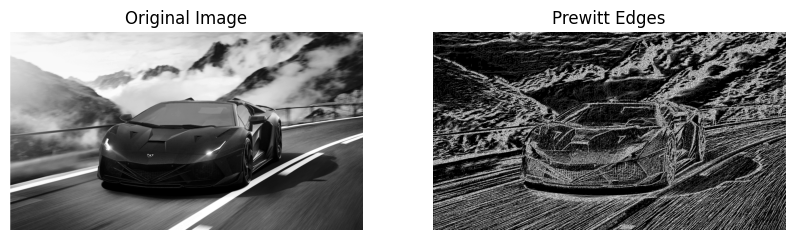

In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def prewitt_edge_detection(image):
    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])

    kernel_y = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]])

    # Apply kernels to the image to compute gradients
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute magnitude of gradients
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return magnitude

# Read the image
image = cv2.imread('image_4.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Prewitt edge detection
edges = prewitt_edge_detection(image)

# Plot the original and edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Prewitt Edges')
plt.axis('off')

plt.show()


The Prewitt method theorically is sensitive to noise which means it can be sensitive to noise in the image, leading to false edges being detected or weak edges being missed. This sensitivity can result in an inaccurate representation of the true edges in the image. Also, Prewitt edge detection tends to produce thick edges, meaning it may not accurately localize edges to a single pixel. This can make it difficult to precisely locate the boundaries of objects in the image.

So, `Non-maximum suppression (NMS)` will a post-processing technique commonly used in edge detection algorithms to refine the detected edges and improve their localization. When combined with the Prewitt edge detection method, NMS can help address some of its drawbacks, particularly in enhancing edge localization and reducing edge thickness. 

Two lines of code
``` python
     for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
```

These nested loops iterate over each pixel position (i, j) in the magnitude array, excluding the border pixels. This is because non-maximum suppression involves comparing each pixel with its neighbors, and border pixels don't have a complete set of neighbors to compare with.

```python
        if (0 <= angle < np.pi / 8) or (15*np.pi / 8 <= angle <= 2*np.pi):
                if (magnitude[i, j] >= magnitude[i, j - 1]) and (magnitude[i, j] >= magnitude[i, j + 1]):
                        suppressed_magnitude[i, j] = magnitude[i, j]
```

This block of code handles the case where the gradient direction is approximately horizontal (within 0 to π/8 radians or from 15π/8 to 2π radians). If the magnitude of the current pixel is greater than or equal to both its left and right neighbors, it retains the magnitude value. This means the current pixel is considered as a potential edge point if it has a higher magnitude than its neighboring pixels along the edge direction.

The direction of the gradient at each pixel is calculated using the arctangent function:

![image info](./gradient.png)

This computes the angle of the gradient vector relative to the x-axis. Again, it's a mathematical operation involving trigonometric functions.

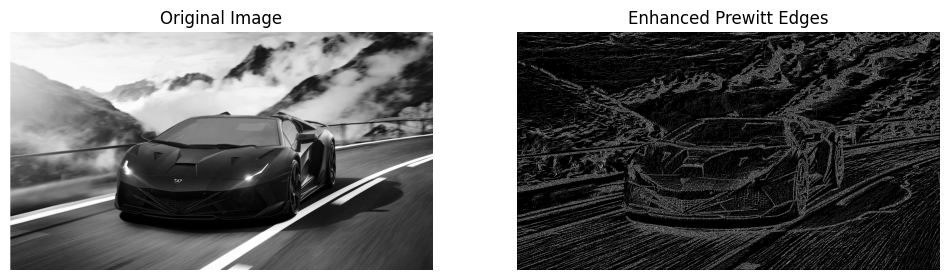

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def prewitt_edge_detection(image):
    # Gaussian Blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])

    kernel_y = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]])

    # Apply kernels to the blurred image to compute gradients
    gradient_x = cv2.filter2D(blurred_image, -1, kernel_x)
    gradient_y = cv2.filter2D(blurred_image, -1, kernel_y)

    # Compute magnitude of gradients
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Non-maximum suppression
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    suppressed_magnitude = np.zeros_like(magnitude)
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            angle = gradient_direction[i, j]
            if (0 <= angle < np.pi / 8) or (15*np.pi / 8 <= angle <= 2*np.pi):
                if (magnitude[i, j] >= magnitude[i, j - 1]) and (magnitude[i, j] >= magnitude[i, j + 1]):
                    suppressed_magnitude[i, j] = magnitude[i, j]
            elif (np.pi / 8 <= angle < 3*np.pi / 8) or (9*np.pi / 8 <= angle < 11*np.pi / 8):
                if (magnitude[i, j] >= magnitude[i - 1, j + 1]) and (magnitude[i, j] >= magnitude[i + 1, j - 1]):
                    suppressed_magnitude[i, j] = magnitude[i, j]
            elif (3*np.pi / 8 <= angle < 5*np.pi / 8) or (11*np.pi / 8 <= angle < 13*np.pi / 8):
                if (magnitude[i, j] >= magnitude[i - 1, j]) and (magnitude[i, j] >= magnitude[i + 1, j]):
                    suppressed_magnitude[i, j] = magnitude[i, j]
            else:
                if (magnitude[i, j] >= magnitude[i - 1, j - 1]) and (magnitude[i, j] >= magnitude[i + 1, j + 1]):
                    suppressed_magnitude[i, j] = magnitude[i, j]

    return suppressed_magnitude

# Read the image
image = cv2.imread('image_4.jpg', cv2.IMREAD_GRAYSCALE)

# Apply enhanced Prewitt edge detection
edges = prewitt_edge_detection(image)

# Plot the original and enhanced edges
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Enhanced Prewitt Edges')
plt.axis('off')

plt.show()


`Normal Prewitt Output:`
- In this case, you will get an image highlighting both horizontal and vertical edges separately.
- The output will contain edges detected by the Prewitt operator without any additional processing.
- The edges may appear thicker and may contain some noise or redundant pixels.

`Prewitt with Non-maximum Suppression Output:`
- After applying Prewitt edge detection, non-maximum suppression is performed to thin out the detected edges.
- The output will have thinner and more refined edges compared to the normal Prewitt output.
- Redundant or noisy edge pixels will be suppressed, leading to a cleaner edge map.
- The edges will be more accurate and closely represent the true edges in the image.

## ROBERT CROSS' METHOD

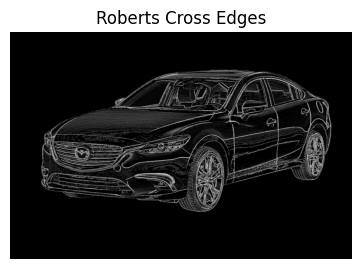

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def roberts_cross_edge_detection(image):
    # Define Roberts Cross kernels
    kernel_x = np.array([[1, 0],
                         [0, -1]])

    kernel_y = np.array([[0, 1],
                         [-1, 0]])

    # Apply kernels to the image to compute gradients
    gradient_x = cv2.filter2D(image, -1, kernel_x)
    gradient_y = cv2.filter2D(image, -1, kernel_y)

    # Compute magnitude of gradients
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return magnitude

# Read the image
image = cv2.imread('image_5.png', cv2.IMREAD_GRAYSCALE)

# Apply edge detection methods
roberts_edges = roberts_cross_edge_detection(image)

# Plot the original and edges
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Cross Edges')
plt.axis('off')


plt.show()


# FEATURE DETECTION

##  HARRIS CORNER

`Harris Corner Detection` is a popular method in computer vision used for detecting interest points or corners in an image. It was introduced by Chris Harris and Mike Stephens in 1988. Harris corner detection is widely used in various computer vision applications such as image stitching, object recognition, and image alignment.

Syntax: `cv.cornerHarris()`
Parameter:
- `gray`: Grayscale image
- `2`: Size of the neighborhood considered for corner detection (parameter k in the Harris corner response function)
- `3`: Aperture parameter of the Sobel derivative used to compute gradients
- `0.04`: Harris detector free parameter (k in the corner response function)

Set a threshold value to determine which points are considered corners. Then, loop through each pixel in the corner response image (dst). If the value of the corner response is greater than the threshold, mark that point as a corner by drawing a red circle around it using the `1cv.circle()` function.

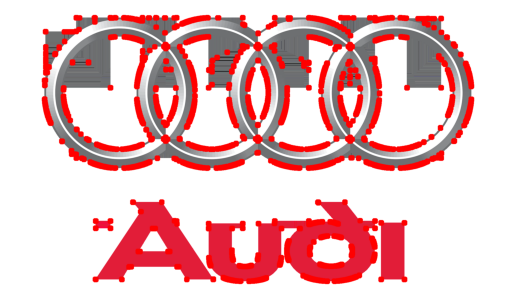

In [30]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = 'image_6.png'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Convert color to grayscale
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None, iterations=4)  # Dilate multiple times for bigger dots

# Mark corners on original image with circles
threshold = 0.01 * dst.max()  # Threshold for detecting corners
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i, j] > threshold:
            cv.circle(img, (j, i), 5, (0, 0, 255), 2)  # Draw a red circle at each corner

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


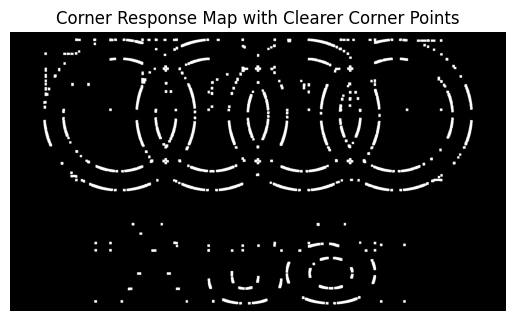

In [31]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

filename = 'image_6.png'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Convert color to grayscale
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None, iterations=4)  # Dilate multiple times for bigger dots

# Thresholding to make corner points clearer
threshold = 0.01 * dst.max()  # Threshold for detecting corners
corner_map = np.zeros_like(dst)
corner_map[dst > threshold] = 255

# Display corner response map with clearer corner points
plt.imshow(corner_map, cmap='gray')
plt.title('Corner Response Map with Clearer Corner Points')
plt.axis('off')
plt.show()


## SIFT

`SIFT (Scale Invariant Feature Transform)` Detector is used in the detection of interest points on an input image. It allows the identification of localized features in images which is essential in applications such as: 
- Object Recognition in Images
- Path detection and obstacle avoidance algorithms
- Gesture recognition, Mosaic generation, etc.

Unlike the `Harris Detector`, which is dependent on properties of the image such as viewpoint, depth, and scale, SIFT can perform feature detection independent of these properties of the image. This is achieved by the transformation of the image data into scale-invariant coordinates. The SIFT Detector has been said to be a close approximation of the system used in the primate visual system.

`cv.SIFT_create()` instantiates a SIFT object using the SIFT algorithm provided by OpenCV. SIFT is an algorithm used for detecting and describing local features in images.

`sift.detect(gray, None)` detects keypoints in the grayscale image (gray) using the SIFT algorithm instantiated earlier.

Detected keypoints are stored in the kp variable, which is a list of KeyPoint objects. Each KeyPoint object represents a detected keypoint with properties such as its location, scale, and orientation.

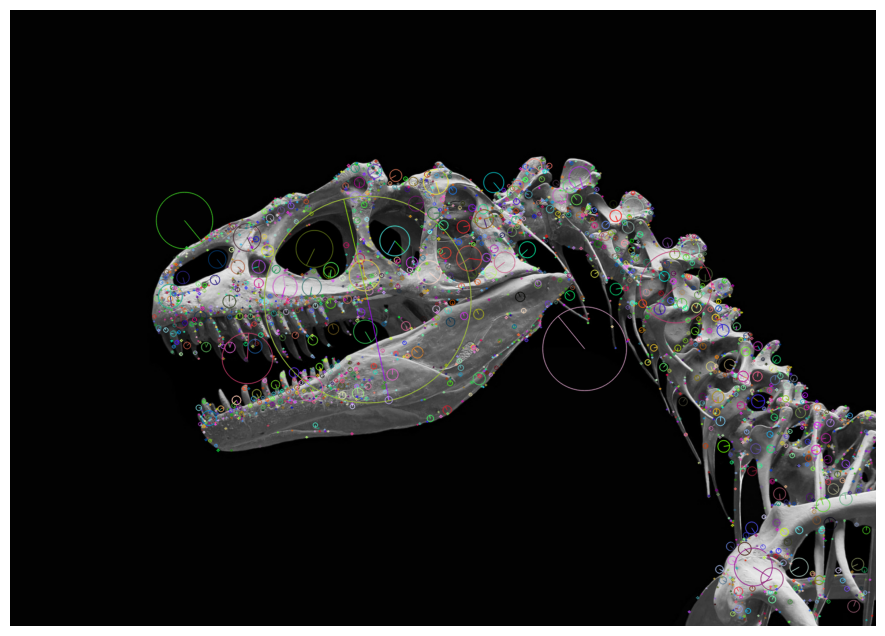

In [32]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('image_9.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv.SIFT_create()

# Detect keypoints
kp = sift.detect(gray, None)

# Draw keypoints with bigger size
img_with_keypoints = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Set figure size to make the image larger
plt.figure(figsize=(12, 8))  # Adjust the dimensions as needed

# Display the image using Matplotlib
plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis
plt.show()


These lines of code enhance the visualization of keypoints by overlaying circles on top of them, with the size of each circle corresponding to the size of the corresponding keypoint. Additionally, the circles are colored green for better visibility. This can provide more insight into the distribution and significance of keypoints within the image.

`for keypoint in kp:` iterates through each keypoint detected by the SIFT algorithm.

`x, y = np.int32(keypoint.pt)`: Extracts the coordinates of the keypoint. pt is a property of the keypoint object that holds its (x, y) position.

`response = keypoint.response`: Extracts the response of the keypoint. The response is a measure of the keypoint's strength or significance.

`size = int(keypoint.size)`: Extracts the size of the keypoint



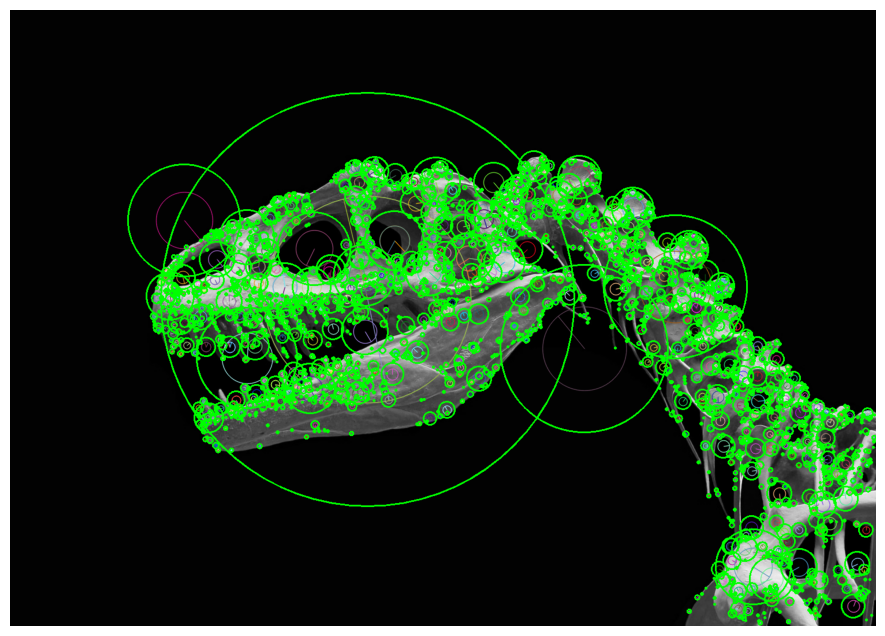

In [33]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('image_9.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv.SIFT_create()

# Detect keypoints
kp = sift.detect(gray, None)

# Draw keypoints with bigger size and overlay with circles of different sizes based on response
img_with_keypoints = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
for keypoint in kp:
    x, y = np.int32(keypoint.pt)
    response = keypoint.response
    size = int(keypoint.size)
    cv.circle(img_with_keypoints, (x, y), size, (0, 255, 0), 2)  # Draw circles with green color

# Set figure size to make the image larger
plt.figure(figsize=(12, 8))  # Adjust the dimensions as needed

# Display the image using Matplotlib
plt.imshow(cv.cvtColor(img_with_keypoints, cv.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis
plt.show()


These lines of code are used for detecting keypoints in an image using the Scale-Invariant Feature Transform (SIFT) algorithm and visualizing those keypoints with their orientations overlaid on the image. 

`kp, des = sift.compute(gray, kp)`:` Computes the keypoints with their orientations and descriptors (des) using the compute method of the SIFT object. This step calculates additional information about each keypoint, including its orientation and a descriptor vector that describes the local image region around the keypoint.

`img_with_orientation = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS):` Draws the keypoints with their orientations on the original image (img). The `flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` argument ensures that the drawn keypoints include their size, orientation, and other information.

A for loop iterates over each keypoint (keypoint) in the list of keypoints (kp). For each keypoint, it calculates the endpoint of a line representing the orientation of the keypoint and draws this line on img_with_orientation.

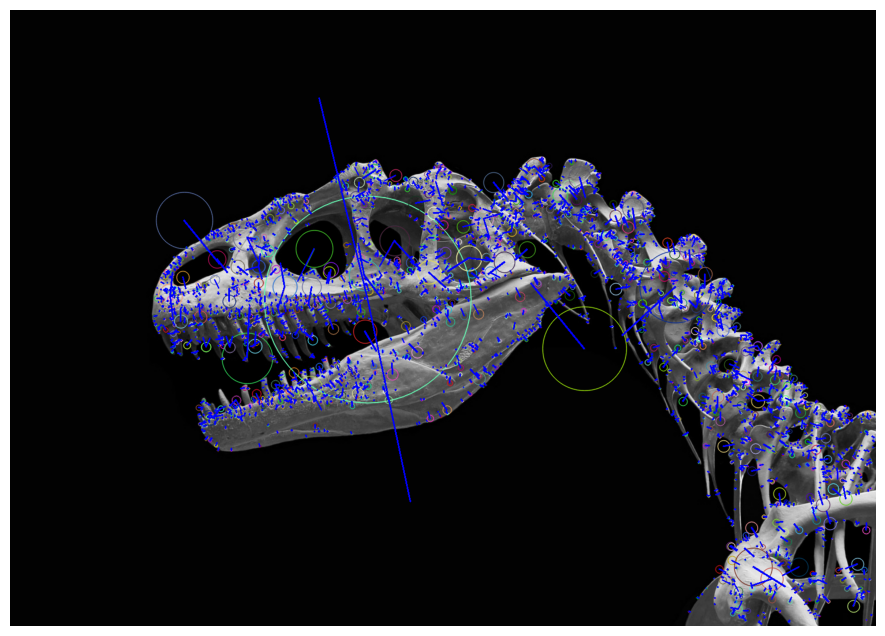

In [34]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('image_9.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SIFT object
sift = cv.SIFT_create()

# Detect keypoints
kp = sift.detect(gray, None)

# Compute keypoints with orientation
kp, des = sift.compute(gray, kp)

# Draw keypoints with orientation
img_with_orientation = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
for keypoint in kp:
    x, y = np.int32(keypoint.pt)
    size = int(keypoint.size)
    angle = keypoint.angle
    # Calculate the endpoint of the line representing orientation
    x2 = int(x + size * np.cos(angle * np.pi / 180.0))
    y2 = int(y + size * np.sin(angle * np.pi / 180.0))
    cv.line(img_with_orientation, (x, y), (x2, y2), (255, 0, 0), 2)  # Draw line representing orientation

# Set figure size to make the image larger
plt.figure(figsize=(12, 8))  # Adjust the dimensions as needed

# Display the image using Matplotlib
plt.imshow(cv.cvtColor(img_with_orientation, cv.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis
plt.show()


## FAST


In computer vision (CV), a "fast detector" typically refers to a type of feature detector used for detecting interest points or keypoints in images efficiently. These detectors are crucial components in many computer vision tasks, such as object detection, image registration, and image stitching. 

Features from Accelerated Segment Test Detector: FAST is a corner detection algorithm proposed by Edward Rosten in 2006. It's designed to be computationally efficient and capable of detecting keypoints in real-time applications.

FAST operates by comparing the intensity of pixels in a circular neighborhood around each candidate pixel. If the intensity of a pixel is significantly different from that of the candidate pixel, it's considered a potential corner.

The key idea behind FAST is to efficiently identify corners by examining only a small subset of pixels in the neighborhood.

`fast = cv.FastFeatureDetector_create()` This line creates a FAST (Features from Accelerated Segment Test) feature detector object with default parameters. FAST is a corner detection algorithm designed to be computationally efficient.

`kp = fast.detect(img, None)` This line detects keypoints in the grayscale image (img) using the FAST feature detector (fast).
The detected keypoints are stored in the variable kp.

`img_with_keypoints_true = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))` This line draws the detected keypoints (kp) on the original grayscale image (img) and stores the result in img_with_keypoints_true.
The color=(255, 0, 0) argument specifies the color of the keypoints (in this case, red).

`fast.setNonmaxSuppression(0)` This line disables non-maximum suppression in the FAST feature detector. Non-maximum suppression is a technique used to reduce the number of keypoints by retaining only the most significant ones.




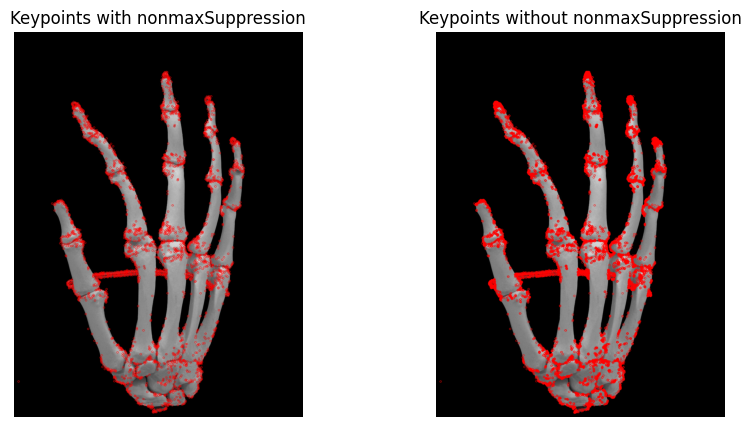

In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the grayscale image
img = cv.imread('image_8.jpg', cv.IMREAD_GRAYSCALE)

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# Find and draw the keypoints with nonmaxSuppression enabled
kp = fast.detect(img, None)
img_with_keypoints_true = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))

# Find and draw the keypoints with nonmaxSuppression disabled
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
img_with_keypoints_false = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_with_keypoints_true, cmap='gray')
plt.title('Keypoints with nonmaxSuppression')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_keypoints_false, cmap='gray')
plt.title('Keypoints without nonmaxSuppression')
plt.axis('off')

plt.show()


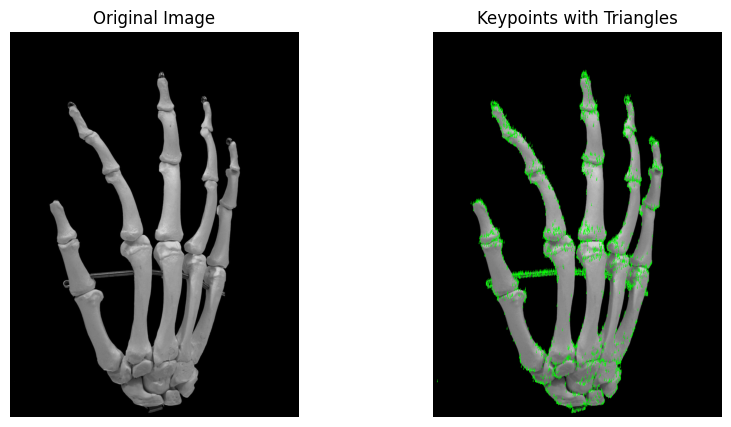

In [36]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#sap chp akfjklasjflsajfklajfljfkladjklcvasjkldfsalasklnklsajfdsfksjf
# Load the grayscale image
img = cv.imread('image_8.jpg', cv.IMREAD_GRAYSCALE)

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# Find keypoints
kp = fast.detect(img, None)

# Create an image with the same dimensions as the input image for drawing custom keypoints
img_custom_keypoints = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

# Define a function to draw a triangle at a given point with a given size and orientation
def draw_triangle(img, center, size, color, orientation):
    angle = orientation * np.pi / 180.0
    half_size = int(size / 2)
    triangle_points = np.array([
        [center[0], center[1] - size],
        [center[0] - half_size * np.sin(angle), center[1] + half_size * np.cos(angle)],
        [center[0] + half_size * np.sin(angle), center[1] + half_size * np.cos(angle)]
    ], np.int32)
    cv.fillConvexPoly(img, triangle_points, color)

# Draw keypoints with triangles
for keypoint in kp:
    center = np.int32(keypoint.pt)
    size = int(keypoint.size)
    orientation = keypoint.angle
    draw_triangle(img_custom_keypoints, center, size, (0, 255, 0), orientation)

# Display the images using Matplotlib
plt.figure(figsize=(10, 5))

#hello worldg
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_GRAY2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_custom_keypoints, cv.COLOR_BGR2RGB))
plt.title('Keypoints with Triangles')
plt.axis('off')

plt.show()


Reference source:

Sobel's edge detection: <https://www.projectrhea.org/rhea/index.php/An_Implementation_of_Sobel_Edge_Detection>

Prewitt Operator: <https://www.tutorialspoint.com/dip/prewitt_operator.htm>

NMS: <https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/>

SIFT: <https://www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/>